# 0. Import required libraris

In [1]:
# Packages import
import numpy as np;
from matplotlib import pyplot as plt;
from planar_utils import plot_decision_boundary, load_planar_dataset, load_extra_datasets
from testCases_v2 import *
%matplotlib inline

# 1. Dataset loading

In [2]:
X,Y = load_planar_dataset();

# 2.  Exploratory data analysis

In [3]:
x_shape, y_shape, num_examples, num_features = X.shape, Y.shape, X.shape[1], X.shape[0]

<table style ="width:250px; height:150px;">
    <tr>
        <td>**Shape of X**</td>
        <td> {{x_shape}} </td>
    </tr>
    <tr>
        <td>**Shape of Y**</td>
        <td> {{y_shape}} </td>
    </tr>
    <tr>
        <td>**Number of training examples**</td>
        <td> {{num_examples}} </td>
    </tr>
    <tr>
        <td>**Number of features**</td>
        <td> {{num_features}} </td>
    </tr>
</table>

In [4]:
print ("First 5 training examples are \n {}".format (X[:,0:5]) )

First 5 training examples are 
 [[ 1.20444229  0.1587099   0.0952472   0.34917847  0.69415038]
 [ 3.57611415 -1.4821709  -1.27995533 -2.06437997  2.88910878]]


In [5]:
print ("First 5 object`s targets are \n {}".format(Y[:,0:5]))

First 5 object`s targets are 
 [[0 0 0 0 0]]


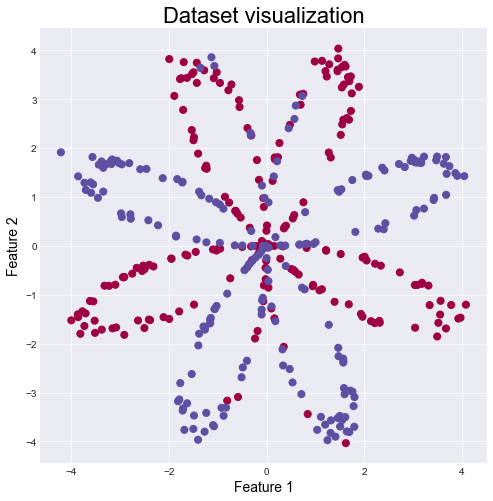

In [6]:
# dataset visualization
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 8, 8
sns.set_style("darkgrid")
plt.xlabel('Feature 1', size = 14, color = 'black', fontname = 'Arial', weight = 'normal')
plt.ylabel('Feature 2', size = 14, color = 'black', fontname = 'Arial', weight = 'normal')
plt.title('Dataset visualization', size = 22, color = 'black')
plt.scatter(x=X[0,:].reshape (1,num_examples),y=X[1,:].reshape(1,num_examples), c= Y, cmap=plt.cm.Spectral, s=50)

# 4. Neural Network model

## 4.1 What is a Neural Network

**Picture of our Neural Network**:
<img src = "images/classification_kiank.png" style="width:600px; height:400px;">

**Mathematically**:

**Formard propagation**:
For each traning example $ x^{(i)} $ , $ i=1..m $ compute
$ z^{[1](i)}_{nh*1} = W^{[1]}_{nh*n}x^{(i)}_{n*1} + b^{[1]}_{nh*1} \tag 1 $ 
$ a^{[1](i)}_{nh*1} = \tanh (z^{[1](i)}_{nh*1}) \tag 2$
$ z^{[2](i)}_{1*1} = W^{[2]}_{1*nh}a^{[1](i)}_{nh*1} + b^{[2]}_{1*1} \tag 3 $
$ \hat{y}^{(i)} = a^{[2](i)}_{1*1} = \sigma(z^{[2](i)}_{1*1}) \tag 4 $

** Prediction after forward propagation**:
$ y^{(i)}_{prediction} = \begin{cases} 1 &\mbox{if}  \hat{y}^{(i)} > 0.5 \\ 0 & \mbox{otherwise} \end{cases} \tag 5$
**Cost function**:

Given the predictions on all the examples, you can also compute the cost  $ J $  as follows:

$ J(W^{[1]}, W^{[2]}, b^{[1]}, b^{[2]}) = - \frac{1}{m} \sum \limits_{i=0}^{m} (y^{(i)}\log{\hat{y}^{(i)}} + (1 - y^{(i)})\log({1 - \hat{y}^{(i)}})) \tag 6$

**Steps of building neural network**:

1. Define neural network architecture ( number of hidden layers)
2. NN Initialization
3. Loop (per iterations, etc.):
    - forward propagation
    - compute value of cost function
    - backward propagation ( compute gradients)
    - update parameters

## 4.2 Neural Network implementation

In [2]:
def nn_model(X , Y , n_h, learning_rate = 0.001, num_iterations = 100000, print_cost = False):
    """
    Arguments:
    X - training set; 
    Y - targets;
    n_h - number of hidden neurans;
    learning_rate - speed gradient descent;
    num_iterations - number of iterations for NN training;
    print_cost - if True, print cost function value every 1000 iterations;
    
    Returns:
    parameters - Return parameters of neural network, requires to predict
    """
    n_x, n_h, n_y = define_architecture(X,n_h,Y)
    weights = nn_init (n_x,n_h,n_y)

    for i in range(num_iterations):
        cache = forward_prop(X,weights)
        cost = compute_cost (cache['A2'], Y)
        if i%1000 == 0 and print_cost:
            print ("Cost after " + str(i) + " iterations: " + str(cost));
        grads = back_prop(cache, weights, X , Y);
        weights = update_weights (weights, grads, learning_rate);
    return weights;
    

In [3]:
def define_architecture(X,n_h,Y):
    """
    Argumets:
    X - training dataset of size n*m (n - number features, m - number of training examples)
    n_h - number of neurans in hidden layer
    Y - targets to training dataset of size 1*m (m - number of training examples)
    
    Return:
    n_x - number neurans in INPUT LAYER
    n_h - number neurans in HIDDEN LAYER
    n_y - number neurans in OUTPUT LAYER
    """
    
    return X.shape[0],n_h,Y.shape[0];

In [4]:
def nn_init(n_x, n_h, n_y):
    """
    Arguments:
    n_x - number neurans in INPUT LAYER
    n_h - number neurans in HIDDEN LAYER
    n_y - number neurans in OUTPUT LAYER
    
    Return:
    weights - weights of NN after initialization ( W1, b1, W2, b2)
    """
    #np.random.seed(2);
    weights = dict();
    
    weights['W1'] = np.random.randn(n_h, n_x)*0.001;
    weights['b1'] = np.zeros((n_h,1));
    weights['W2'] = np.random.randn(n_y,n_h)*0.001;
    weights['b2'] = np.zeros((n_y,1));
    
    return weights;

In [5]:
def sigmoid(Z):
    """
    Compute sigmoid of Z
    """
    return 1/(1+np.exp(-Z));

In [6]:
def forward_prop(X, weights):
    """
    Arguments:
    X - training dataset of size n_x*m
    weights - dict of weights
            - W1 of size n_h*n_x
            - b1 of size n_h*1
            - W2 of size n_y*n_h
            - b2 of size n_y*1
            
    Returns:
    cache - dict containing Z1, A1, Z2, A2
          - Z1 and A1 of size n_h*m
          - Z2 and A2 of size 1*m
    """
    cache = dict ();
    W1 = weights['W1'];
    b1 = weights['b1'];
    W2 = weights['W2'];
    b2 = weights['b2'];
    cache['Z1']  = Z1 = np.dot(W1,X) + b1;
    cache['A1']  = A1 = np.tanh(Z1);
    cache['Z2']  = Z2 = np.dot(W2,A1) + b2;
    cache['A2']  = sigmoid(Z2);
    return cache;

In [7]:
def compute_cost(A2,Y):
    """
    Compute LogLoss error of neural netwotk
    Arguments:
    A2 - predicted targets
    Y - true targets
    
    Return:
    LogLoss error
    """
    m = Y.shape[1];
    return - np.sum(Y*np.log(A2) +(1 - Y)*np.log(1-A2))/m

<center> **Help image to compute gradients** </center> 
<img src = "images/grad_summary.png" style = "width:600px;height:300px;">

In [8]:
def back_prop(cache,weights,X,Y):
    """
    Compute gradients for parameter updating
    Arguments:
    cache - dictionary containing Z1,A1,Z2,A2
    X - training dataset
    Y - targets of training examples
    
    Return:
    grads - gradients for gradient descent
    """
    grads = dict ();
    m = Y.shape[1];
    
    dZ2 = cache['A2'] - Y; # (1*m) 
    grads['dW2'] = np.dot(dZ2, cache['A1'].transpose())/m;
    grads['db2'] = np.sum(dZ2,axis = 1, keepdims = True)/m;
    dZ1 = np.dot(weights['W2'].transpose(),dZ2)*(1 - np.power(cache['A1'],2));
    grads['dW1'] = np.dot(dZ1,X.transpose())/m;
    grads['db1'] = np.sum(dZ1, axis=1, keepdims=True)/m;
    return grads;

In [9]:
def update_weights(weights, grads, learning_rate):
    """
    Arguments:
    weights - dict of old NN weights
    grads - dict of gradients
    learning_rate - speed of gradient descent
    
    Return:
    new_weights - new NN weights after update
    """
    
    new_weights = dict();
    new_weights['W1'] = weights['W1'] - learning_rate*grads['dW1'];
    new_weights['b1'] = weights['b1'] - learning_rate*grads['db1'];
    new_weights['W2'] = weights['W2'] - learning_rate*grads['dW2'];
    new_weights['b2'] = weights['b2'] - learning_rate*grads['db2'];
    return new_weights;

In [10]:
def predict(weigths, X):
    """
    Arguments:
    X - dataset
    weights - weights of NN
    
    Return:
    targets - targets of each example in dataset X
    """
    cache = forward_prop(X,weigths);
    predictions = (cache['A2'] > 0.5);
    return predictions;

## 4.3 Experiments

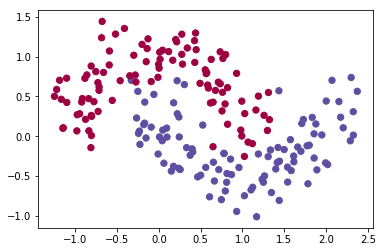

In [11]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :].reshape(1,X.shape[1]), X[1, :].reshape(1,X.shape[1]), c=Y, s=40, cmap=plt.cm.Spectral);

In [20]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 3, learning_rate=0.5, num_iterations = 10000, print_cost=True)

# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Cost after 0 iterations: 0.6931477736889695
Cost after 1000 iterations: 0.32141669922308935
Cost after 2000 iterations: 0.3157270208117913
Cost after 3000 iterations: 0.1359468720909252
Cost after 4000 iterations: 0.08455053373567242
Cost after 5000 iterations: 0.07870854522028506
Cost after 6000 iterations: 0.07601775190082909
Cost after 7000 iterations: 0.07433457124169336
Cost after 8000 iterations: 0.07318750829247003
Cost after 9000 iterations: 0.07235629750486469
Accuracy: 97%


Text(0.5,1,'Decision Boundary for hidden layer size 4')

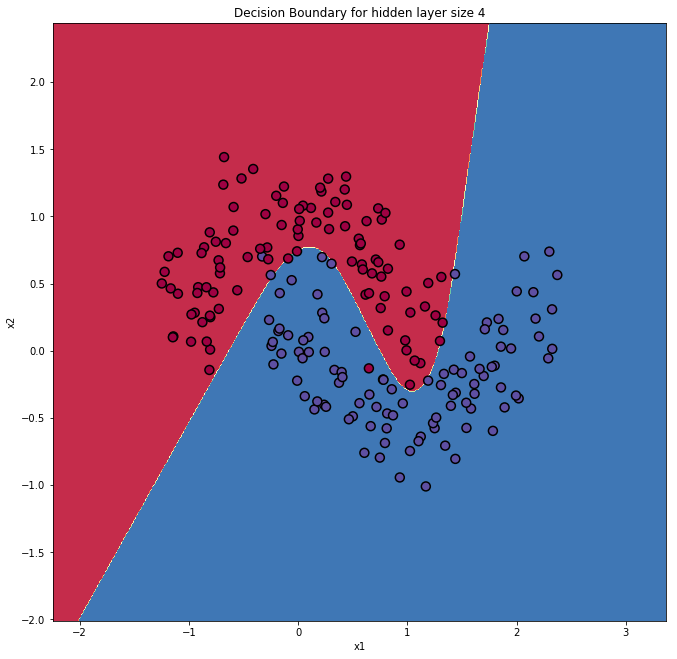

In [21]:
# Ploting
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 11, 11
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [14]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :].reshape((1,X.shape[1])), X[1, :].reshape((1,X.shape[1])), c=y, cmap=plt.cm.Spectral, s = 80, edgecolors='black', linewidths=1.5)
